# Explore here

In [2]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
total_data = pd.read_csv(url)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
total_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


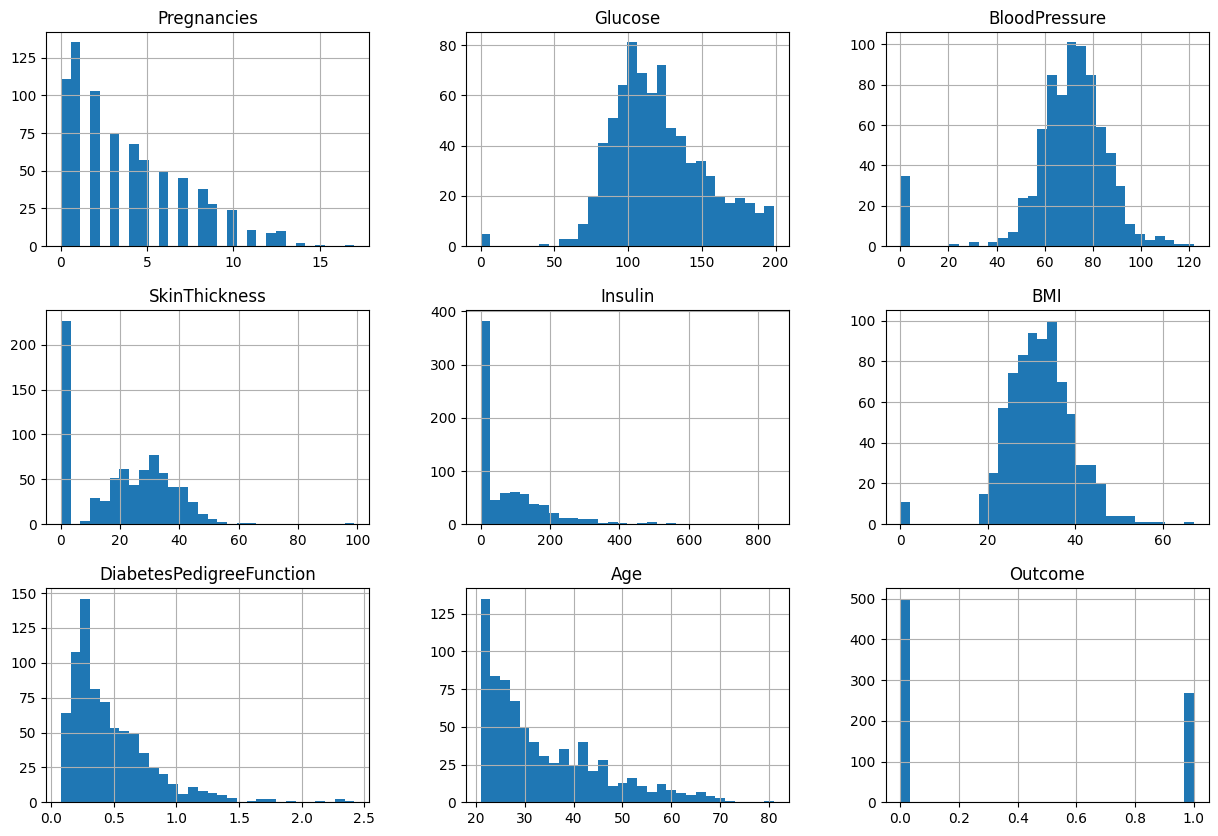

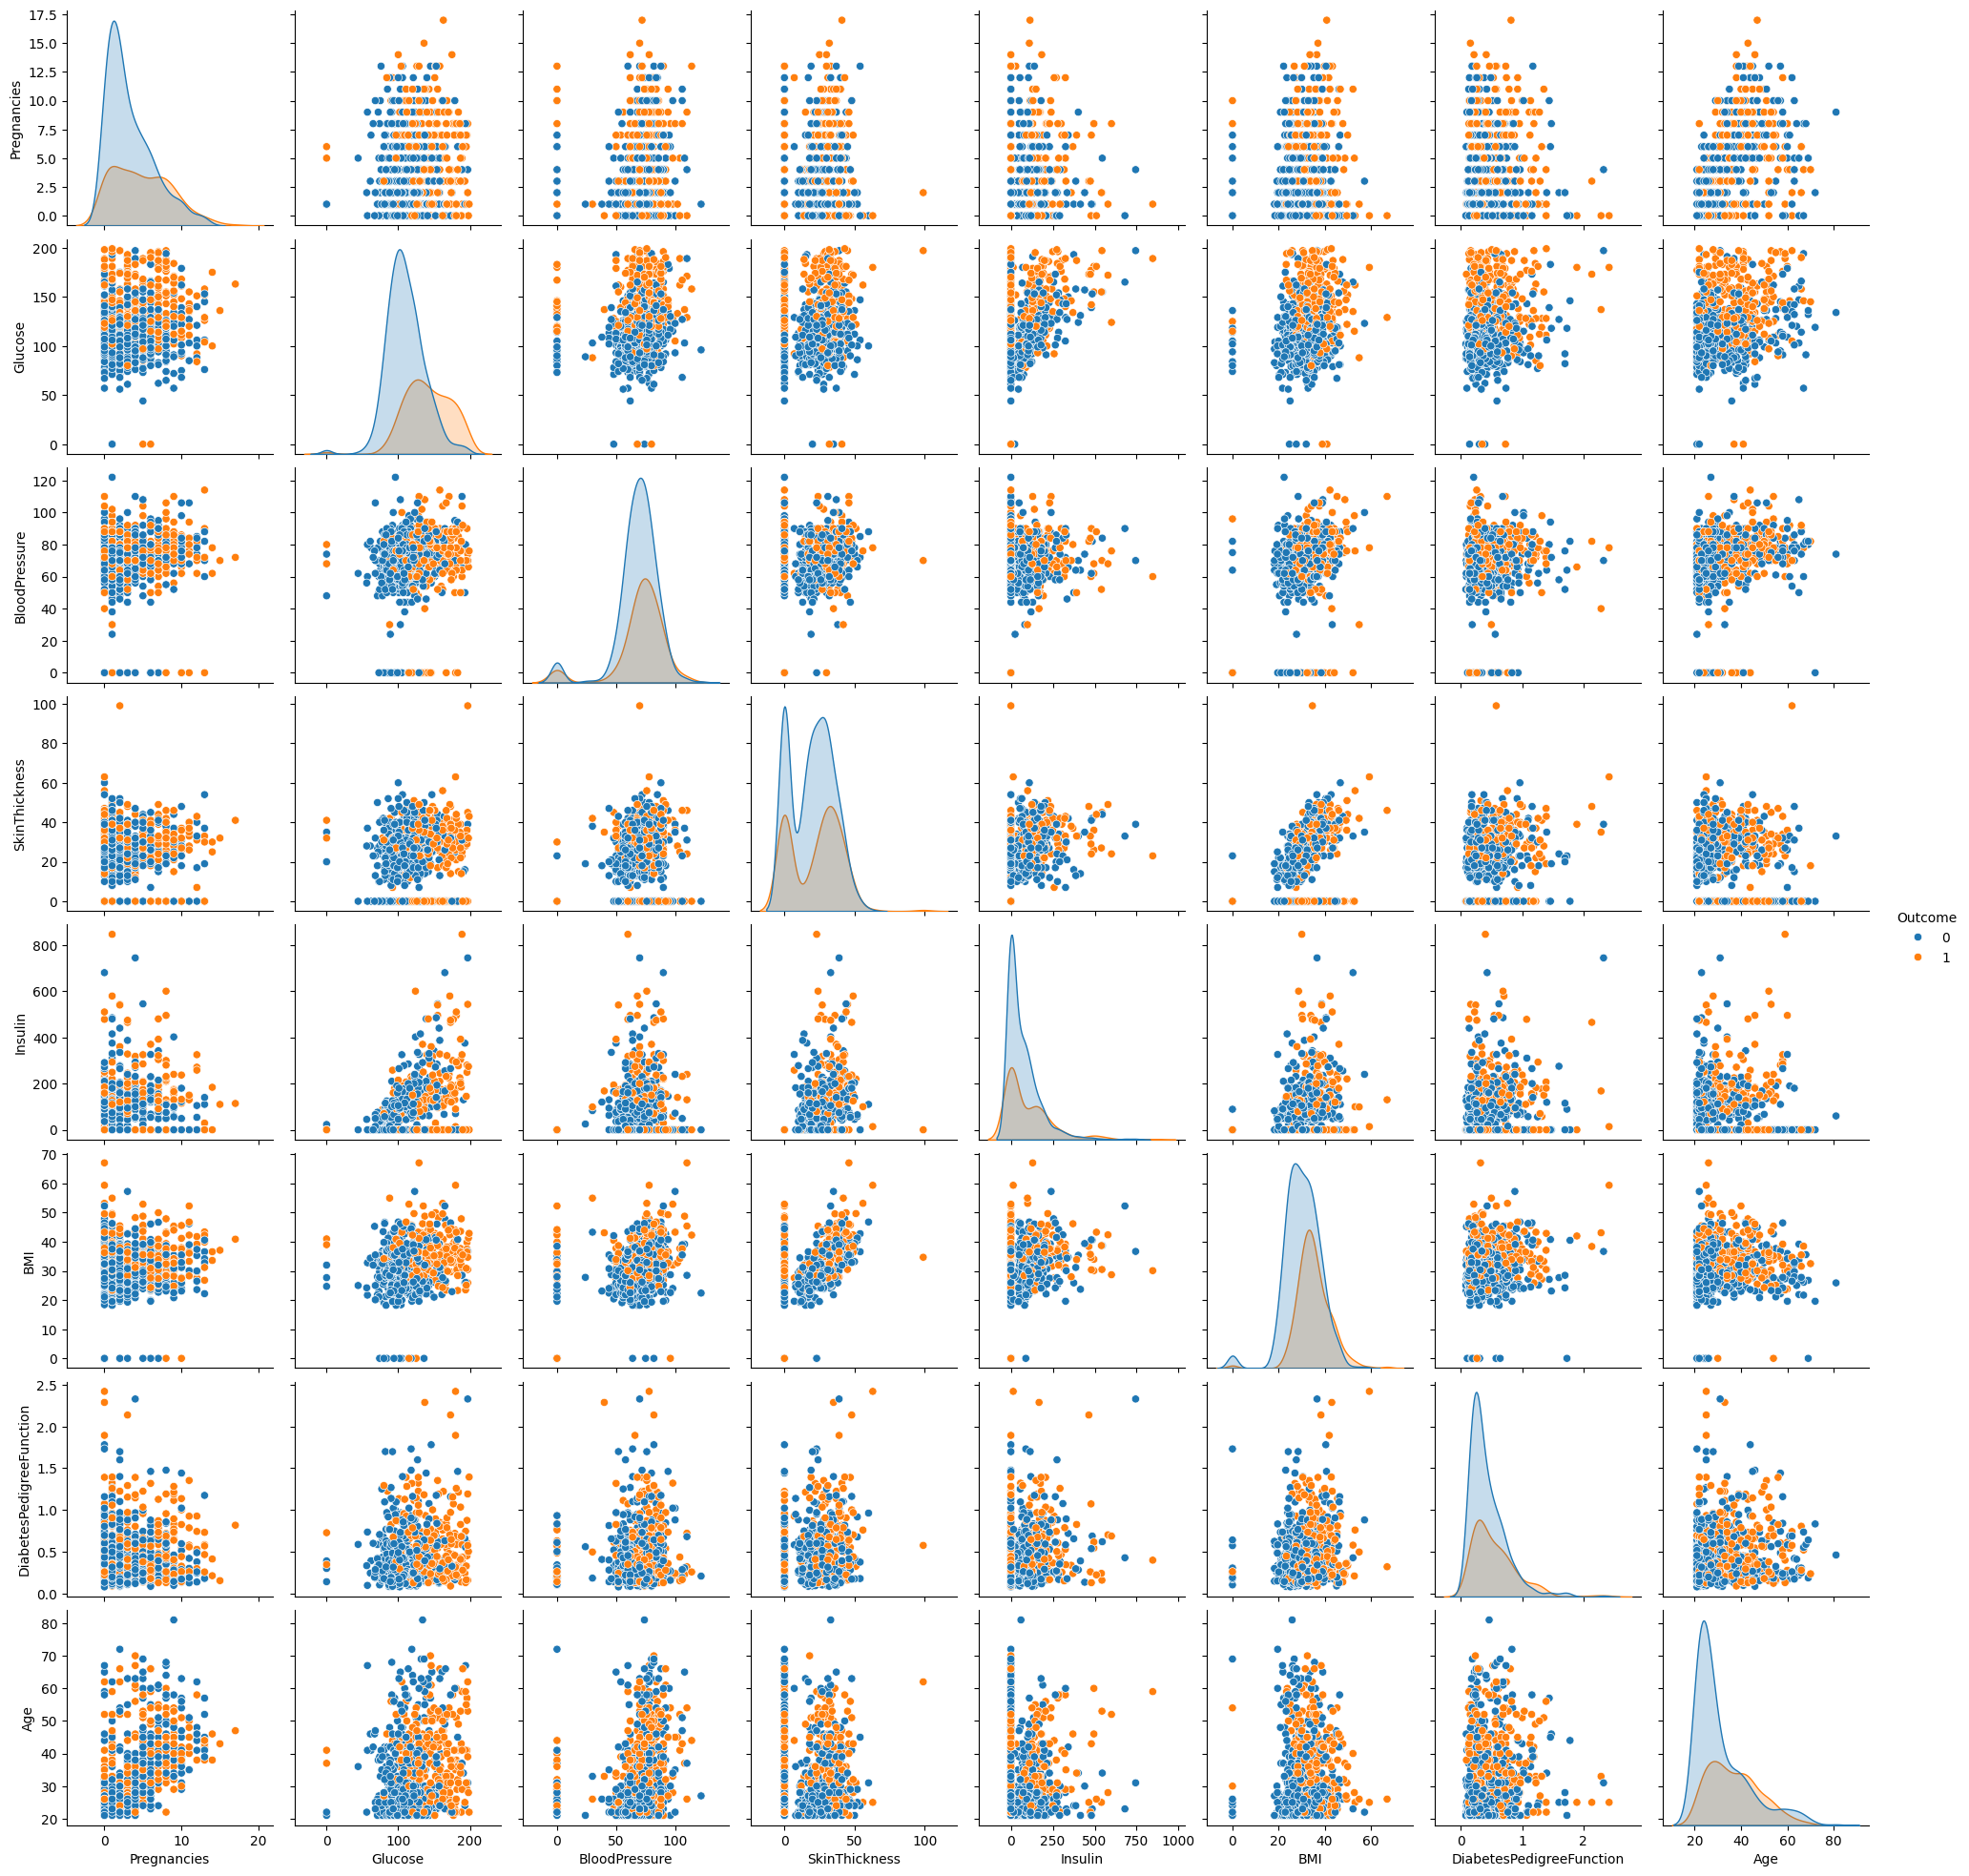

In [38]:
#Visualize the distribution of each feature
total_data.hist(bins=30, figsize=(15, 10))
plt.show()

sns.pairplot(total_data, hue="Outcome")
plt.show()

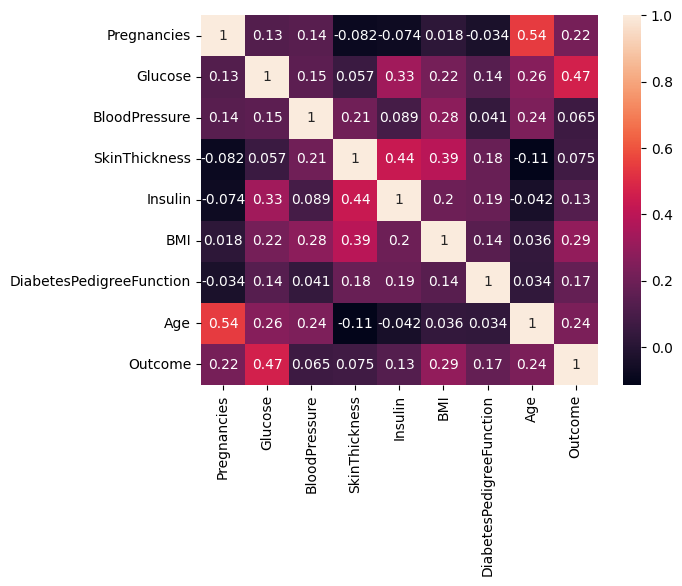

In [75]:
#check correlations with heatmap
corr = total_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
#Split the data into training and testing sets

X = total_data.drop('Outcome', axis=1)
y = total_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
# Get the value counts of each species
total_data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

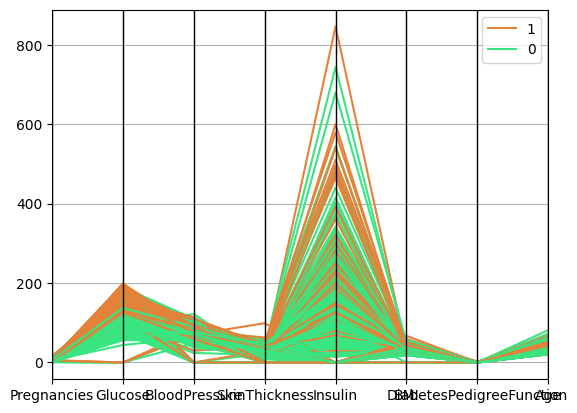

In [12]:
pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

In [13]:
#train the model and initialize the regressor
model = DecisionTreeRegressor(random_state= 42)

# Train the regressor
model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [14]:
#model prediction
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75 24]
 [15 40]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [15]:
#calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (evaluate the regressor)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared: {r2}")

Mean squared error: 0.2532467532467532
Root mean squared error: 0.5032362797401965
R-squared: -0.10303030303030325


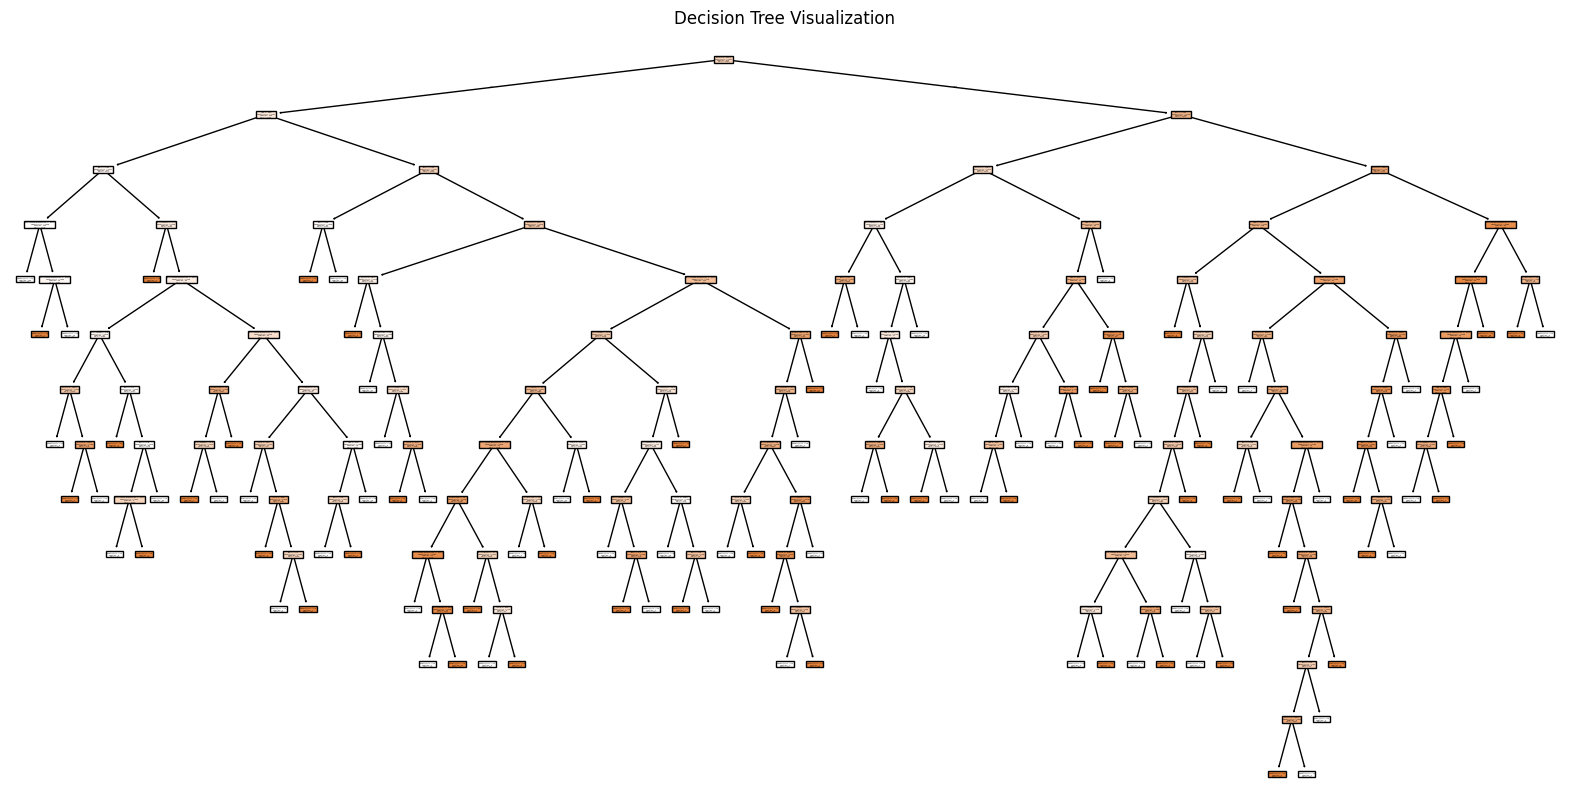

In [16]:
# plot the tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [17]:
# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [-0.39772727 -0.37737962 -0.23964166 -0.12099309 -0.14212766]
Mean cross-validation score: -0.2555738590013701


In [18]:
# define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Iinitialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {-grid_search.best_score_}')  # Negated because we used neg_mean_squared_error


Best Parameters: {'criterion': 'poisson', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.20214382949012286


In [20]:
# Initialize the model with the best parameters
best_regressor = DecisionTreeRegressor(**grid_search.best_params_)

# Train the model
best_regressor.fit(X_train, y_train)

# Make predictions
y_pred_best = best_regressor.predict(X_test)

# Evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Optimized Mean Squared Error: {mse_best}')

Optimized Mean Squared Error: 0.1932421318012922


In [21]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_regressor, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [ 0.06498489  0.09482063  0.08353405 -0.04307987  0.30851414]
Mean cross-validation score: 0.10175476610550589


In [22]:
#making predictions

new_data = pd.DataFrame({
    'Pregnancies': [5],
    'Glucose': [130],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [70],
    'BMI': [32.5],
    'DiabetesPedigreeFunction': [0.6],
    'Age': [40]
})

# Predict the outcome of the new data point
predicted_outcome = best_regressor.predict(new_data)
new_data["Prediction"] = predicted_outcome

new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Prediction
0,5,130,70,30,70,32.5,0.6,40,1.0


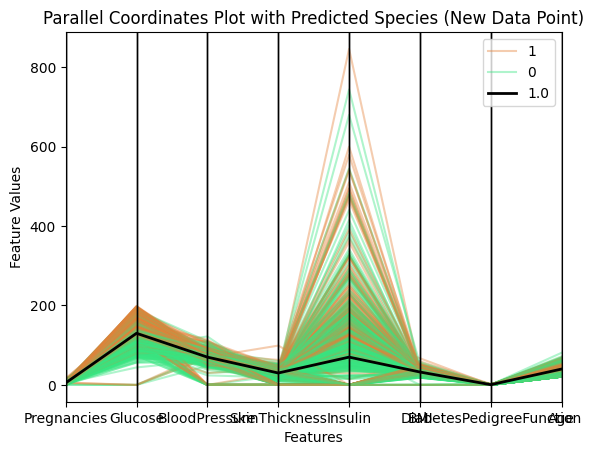

In [23]:
# Plotting using parallel coordinates
pd.plotting.parallel_coordinates(total_data, "Outcome", color=("#E58139", "#39E581", "#8139E5"), alpha=0.4)
pd.plotting.parallel_coordinates(new_data, "Prediction", color="black", linewidth=2)
plt.title('Parallel Coordinates Plot with Predicted Species (New Data Point)')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.legend(loc='upper right')
plt.show()

In [24]:
# Save the model
joblib.dump(best_regressor, 'decision_tree_regressor_model.pkl')

['decision_tree_regressor_model.pkl']